In [3]:
# Imports
from Simulation import Simulation
import numpy as np
import pandas as pd
from openmm import unit
import matplotlib.pyplot as plt

In [4]:
#####Parameters
steps = 100000                        # Number of Simulation Steps/Frames Simulated/Rendered (Unitless) (Integer)
skipSteps = 1                       # The Step Size of each Frame Generated (Unitless) (Integer)
Temperature=225.                    # Temperature at which the simulation is simulated (Kelvin)
dt = 0.005 # * unit.femtoseconds       # The Change in Time between each Frame (Femtoseconds)
nonbondedCutoff=1e3*unit.nanometer  # Distance constituting a Bond between Atoms (Nanometers)
ensemble='NVT'                      # NVE or NVT Ensemble Type (Unitless) (String)
#####

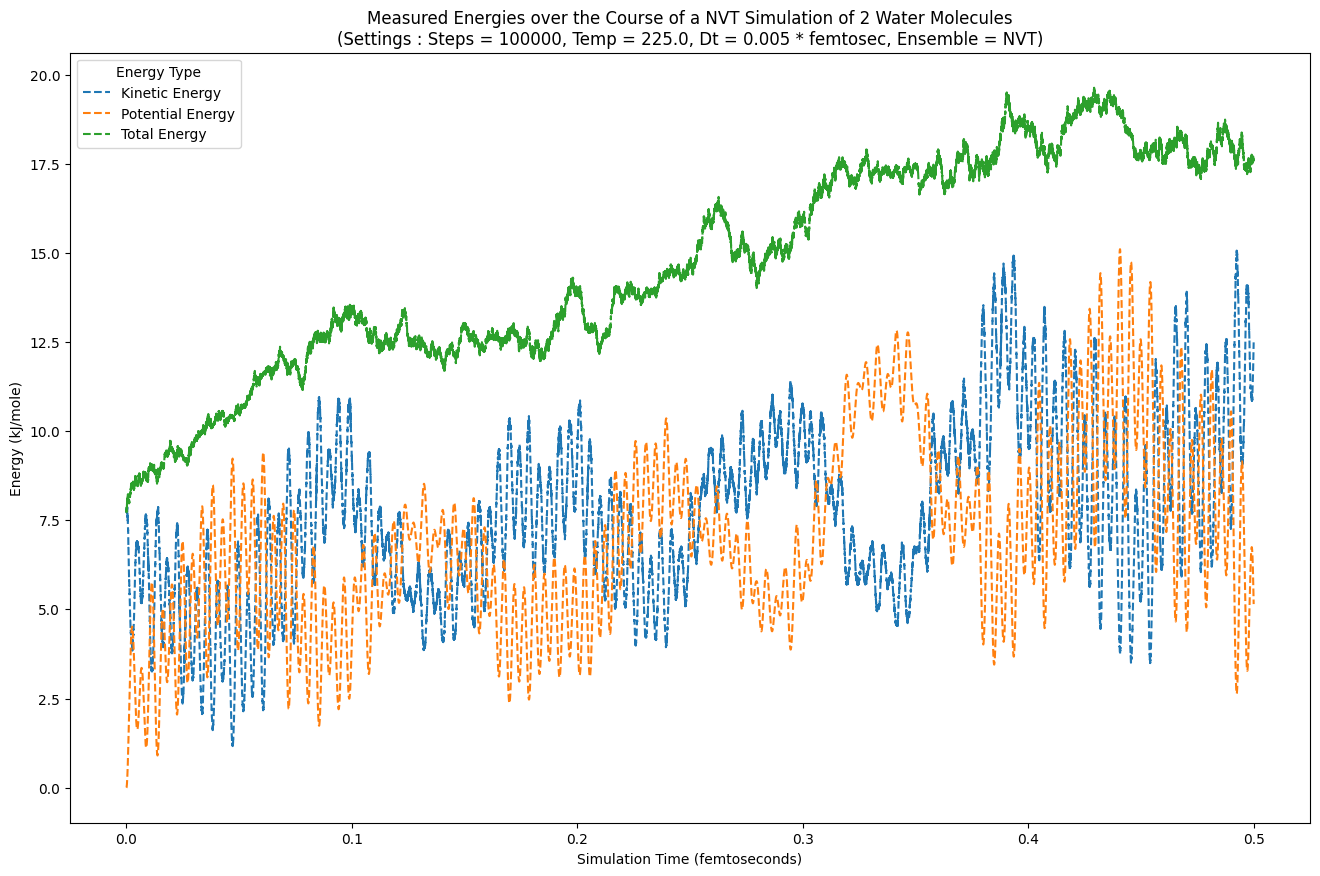

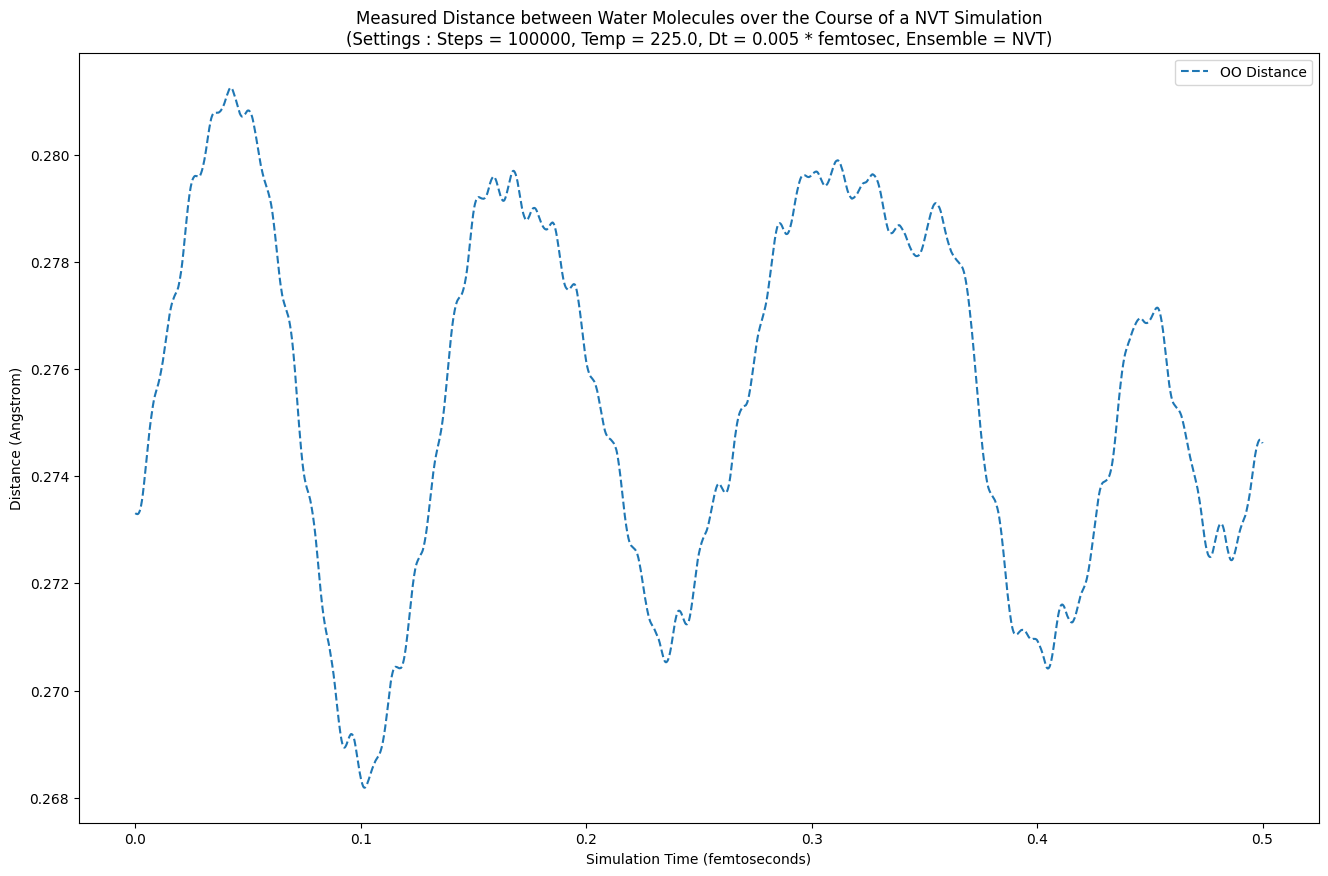

,Type,Kinetic Energy,Potential Energy,Total Energy
0,Average (kJ/mol),7.706184,7.010156,14.716339
1,Variance (kJ/mol),5.917103,6.709889,8.671134


,Type,Average,Variance
0,Distance (Angstrom),0.275505,0.000012


In [5]:
def Q2_2 (steps, Temperature, dt, ensemble, nonbondedCutoff):
    # Simulate
    Simulation(steps, Temperature, dt, ensemble, nonbondedCutoff, "Main")
    
    # Extract the Data from the Outputed Files
    KE = pd.read_csv(f"KEMain.{ensemble}", sep=' ', header=None, names=['Time', 'Energy'])
    PE = pd.read_csv(f"PEMain.{ensemble}", sep=' ', header=None, names=['Time', 'Energy'])
    TE = pd.read_csv(f"TEMain.{ensemble}", sep=' ', header=None, names=['Time', 'Energy'])
    OODist = pd.read_csv(f"rOOMain.{ensemble}", sep=' ', header=None, names=['Time', 'Distance'])

    # Add the Type of Energy to the Dataframes
    KE["Type"] = "Kinetic Energy"
    PE["Type"] = "Potential Energy"
    TE["Type"] = "Total Energy"
    OODist["Type"] = "OO Distance"

    # Plot Energy Graph of System
    plt.figure(figsize=(16, 10))
    plt.ylabel(f"Energy (kJ/mole)")
    plt.xlabel(f"Simulation Time (femtoseconds)")
    plt.plot(KE["Time"], KE["Energy"], "--", label=KE["Type"][0])
    plt.plot(PE["Time"], PE["Energy"], "--", label=PE["Type"][0])
    plt.plot(TE["Time"], TE["Energy"], "--", label=TE["Type"][0])
    plt.title(f"Measured Energies over the Course of a {ensemble} Simulation of 2 Water Molecules\n(Settings : Steps = {steps}, Temp = {Temperature}, Dt = {dt} * femtosec, Ensemble = {ensemble})")
    plt.legend(title="Energy Type")
    plt.savefig("Q2_2.png")
    plt.show()
    
    # Plot Distance Graph of System
    plt.figure(figsize=(16, 10))
    plt.ylabel(f"Distance (Angstrom)")
    plt.xlabel(f"Simulation Time (femtoseconds)")
    plt.plot(OODist["Time"], OODist["Distance"], "--", label=OODist["Type"][0])
    plt.title(f"Measured Distance between Water Molecules over the Course of a {ensemble} Simulation\n(Settings : Steps = {steps}, Temp = {Temperature}, Dt = {dt} * femtosec, Ensemble = {ensemble})")
    plt.legend()
    plt.savefig("Q2_4_Dist.png")
    plt.show()
        
    # Get Average and Variance of Each Energy Type
    KE_AVG = np.average(KE["Energy"])
    KE_VAR = np.var(KE["Energy"])

    PE_AVG = np.average(PE["Energy"])
    PE_VAR = np.var(PE["Energy"])

    TE_AVG = np.average(TE["Energy"])
    TE_VAR = np.var(TE["Energy"])

    OO_AVG = np.average(OODist["Distance"])
    OO_VAR = np.var(OODist["Distance"])
    
    # Put into a Dataframe
    AVGAndVAR = pd.DataFrame({
        "Type" : ["Average (kJ/mol)", "Variance (kJ/mol)"],
        "Kinetic Energy" : [KE_AVG, KE_VAR],
        "Potential Energy" : [PE_AVG, PE_VAR],
        "Total Energy" : [TE_AVG, TE_VAR],
    })
    
    OODistDF = pd.DataFrame({
        "Type": ["Distance (Angstrom)"],
        "Average" : [OO_AVG],
        "Variance" : [OO_VAR]
    })

    # Print the Dataframe
    display(AVGAndVAR)
    display(OODistDF)
    
Q2_2(steps, Temperature, dt, ensemble, nonbondedCutoff)

In [6]:
def Q2_3_DT (steps, Temperature, dt, ensemble, nonbondedCutoff):
    # Simulate
    Simulation(steps, Temperature, dt, ensemble, nonbondedCutoff)
    
    # Extract the Data from the Outputed Files
    KE = pd.read_csv(f"KE.{ensemble}", sep=' ', header=None, names=['Time', 'Energy'])
    PE = pd.read_csv(f"PE.{ensemble}", sep=' ', header=None, names=['Time', 'Energy'])
    TE = pd.read_csv(f"TE.{ensemble}", sep=' ', header=None, names=['Time', 'Energy'])

    # Add the Type of Energy to the Dataframes
    KE["Type"] = "Kinetic Energy"
    PE["Type"] = "Potential Energy"
    TE["Type"] = "Total Energy"

    # Get Average and Variance of Each Energy Type
    KE_AVG = np.average(KE["Energy"])
    KE_VAR = np.var(KE["Energy"])

    PE_AVG = np.average(PE["Energy"])
    PE_VAR = np.var(PE["Energy"])

    TE_AVG = np.average(TE["Energy"])
    TE_VAR = np.var(TE["Energy"])
    
    return [dt, KE_AVG, KE_VAR, PE_AVG, PE_VAR, TE_AVG, TE_VAR]

def Q2_3_Steps (steps, Temperature, dt, ensemble, nonbondedCutoff):
    # Simulate
    Simulation(steps, Temperature, dt, ensemble, nonbondedCutoff)
    
    # Extract the Data from the Outputed Files
    KE = pd.read_csv(f"KE.{ensemble}", sep=' ', header=None, names=['Time', 'Energy'])
    PE = pd.read_csv(f"PE.{ensemble}", sep=' ', header=None, names=['Time', 'Energy'])
    TE = pd.read_csv(f"TE.{ensemble}", sep=' ', header=None, names=['Time', 'Energy'])

    # Add the Type of Energy to the Dataframes
    KE["Type"] = "Kinetic Energy"
    PE["Type"] = "Potential Energy"
    TE["Type"] = "Total Energy"

    # Get Average and Variance of Each Energy Type
    KE_AVG = np.average(KE["Energy"])
    KE_VAR = np.var(KE["Energy"])

    PE_AVG = np.average(PE["Energy"])
    PE_VAR = np.var(PE["Energy"])

    TE_AVG = np.average(TE["Energy"])
    TE_VAR = np.var(TE["Energy"])
    
    
    return [steps, KE_AVG, KE_VAR, PE_AVG, PE_VAR, TE_AVG, TE_VAR]

,Dt (Femtoseconds),KE Average (kJ/mol),KE Variance (kJ/mol),PE Average (kJ/mol),PE Variance (kJ/mol),TE Average (kJ/mol),TE Variance (kJ/mol)
0,0.001,12.181714,0.670173,1.002997,0.749520,13.184711,0.007978
1,0.002,10.885855,13.109292,5.056848,14.177882,15.942703,0.032026
2,0.004,6.687838,2.991350,3.376947,3.368621,10.064785,0.043218
3,0.008,3.443151,0.046567,0.548960,0.064473,3.992112,0.011566
4,0.016,7.560729,8.549562,5.997275,8.979667,13.558005,0.357320
5,0.032,17.986945,29.672852,12.597228,27.446777,30.584173,0.622229


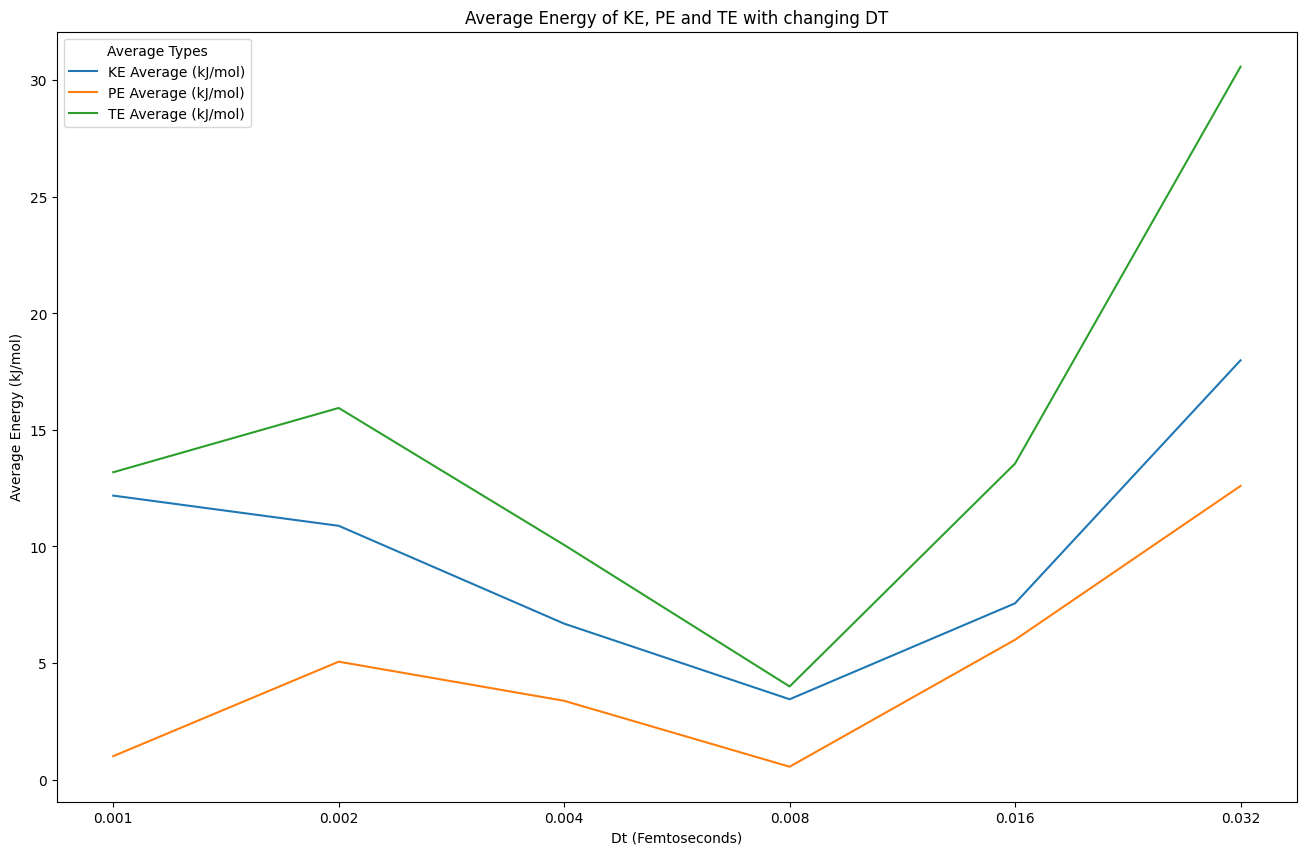

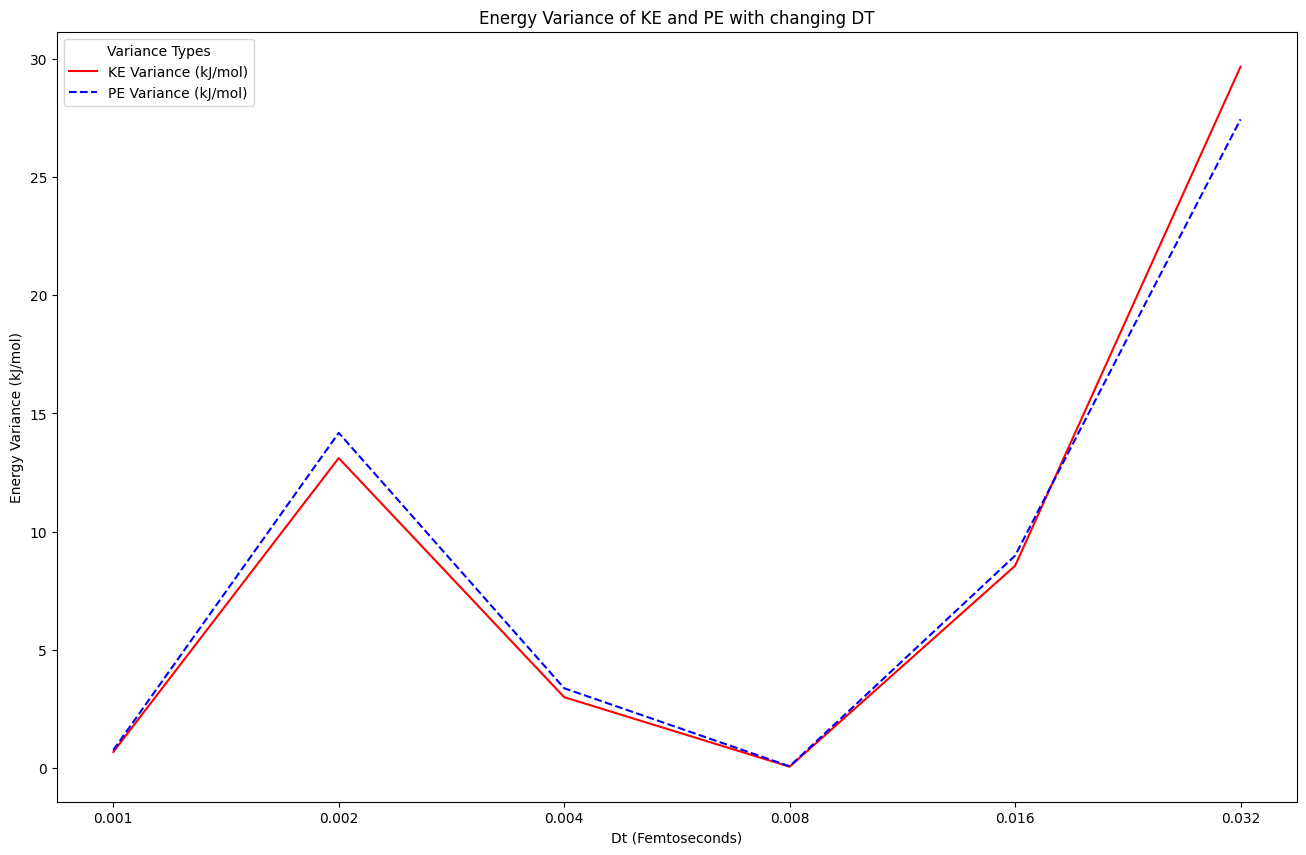

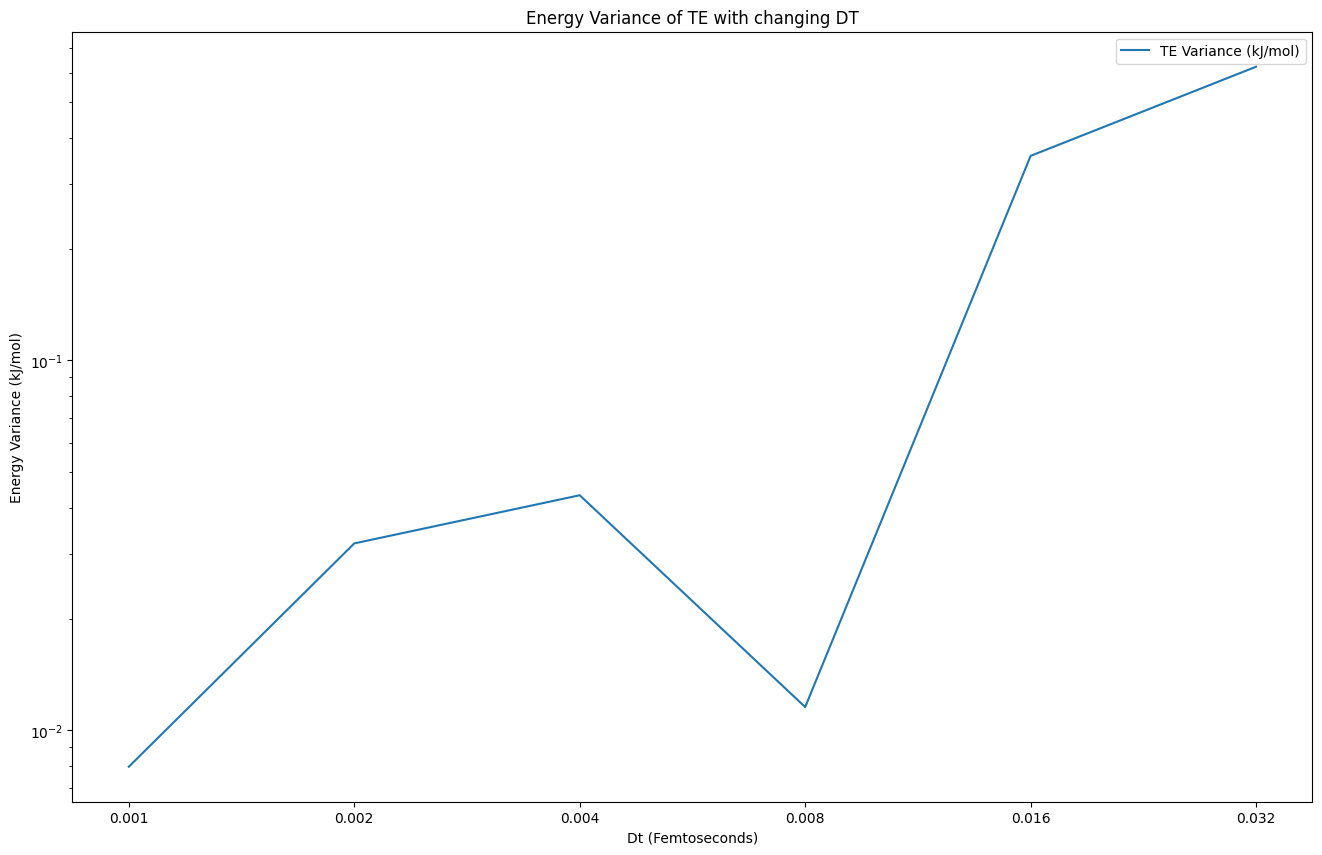

,Steps,KE Average (kJ/mol),KE Variance (kJ/mol),PE Average (kJ/mol),PE Variance (kJ/mol),TE Average (kJ/mol),TE Variance (kJ/mol)
0,1000,11.990754,0.133125,0.579005,0.250841,12.569759,0.025276
1,2000,6.224524,5.344375,3.007295,4.905900,9.231820,0.011577
2,4000,8.199114,0.742567,1.592565,0.747906,9.791679,0.006986
3,8000,9.574298,2.102027,2.420095,1.949560,11.994393,0.088267
4,16000,8.697605,0.784727,1.188345,0.380714,9.885950,0.148680
5,32000,11.504799,22.211904,9.868629,22.230996,21.373427,0.120420


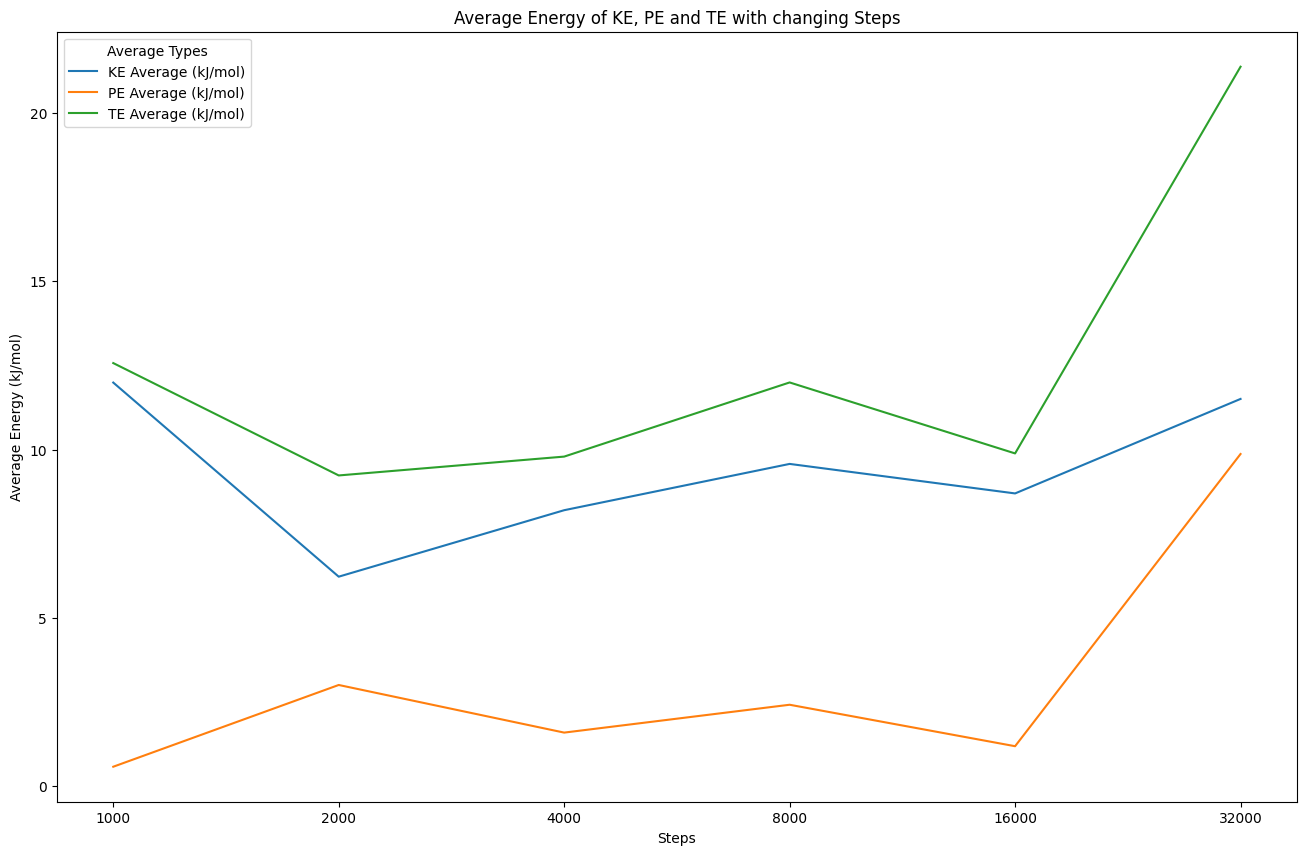

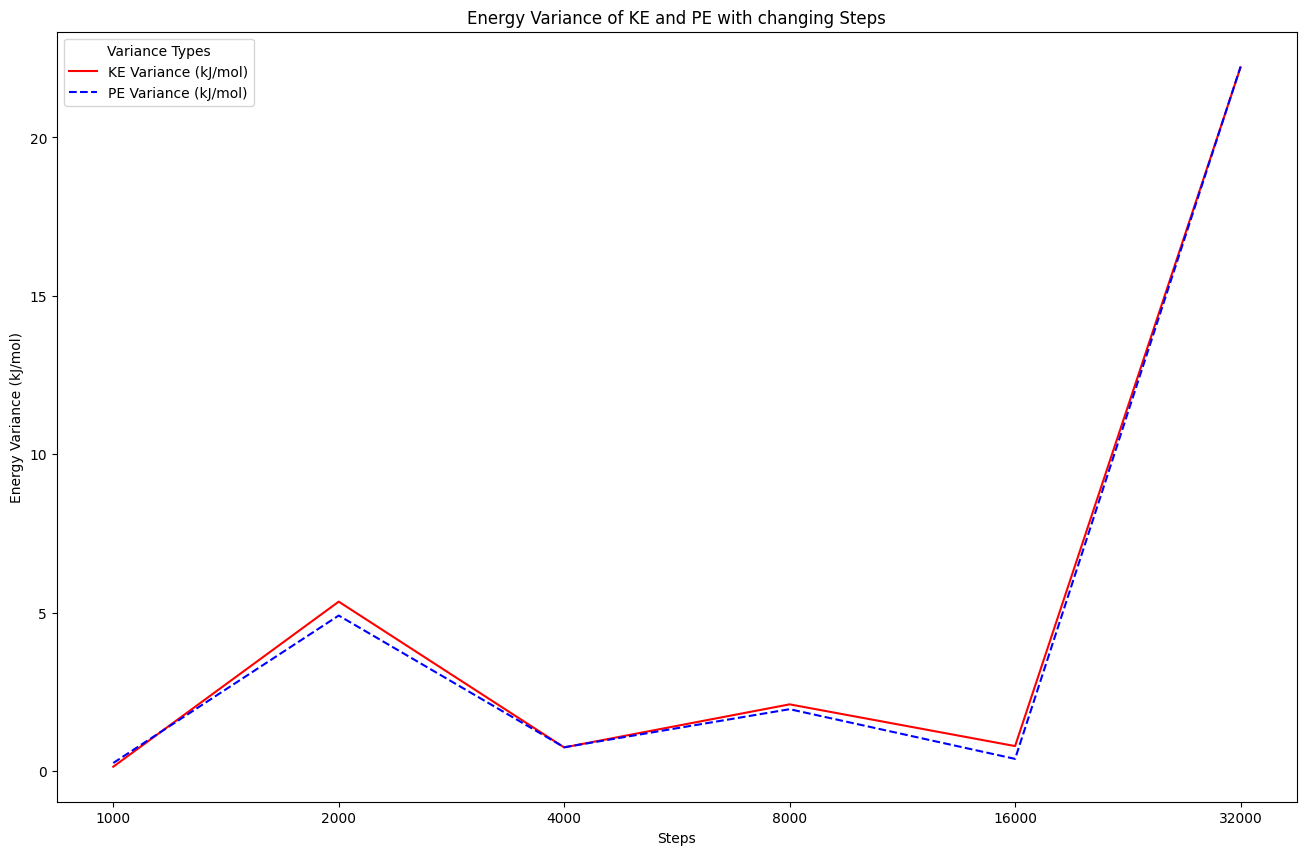

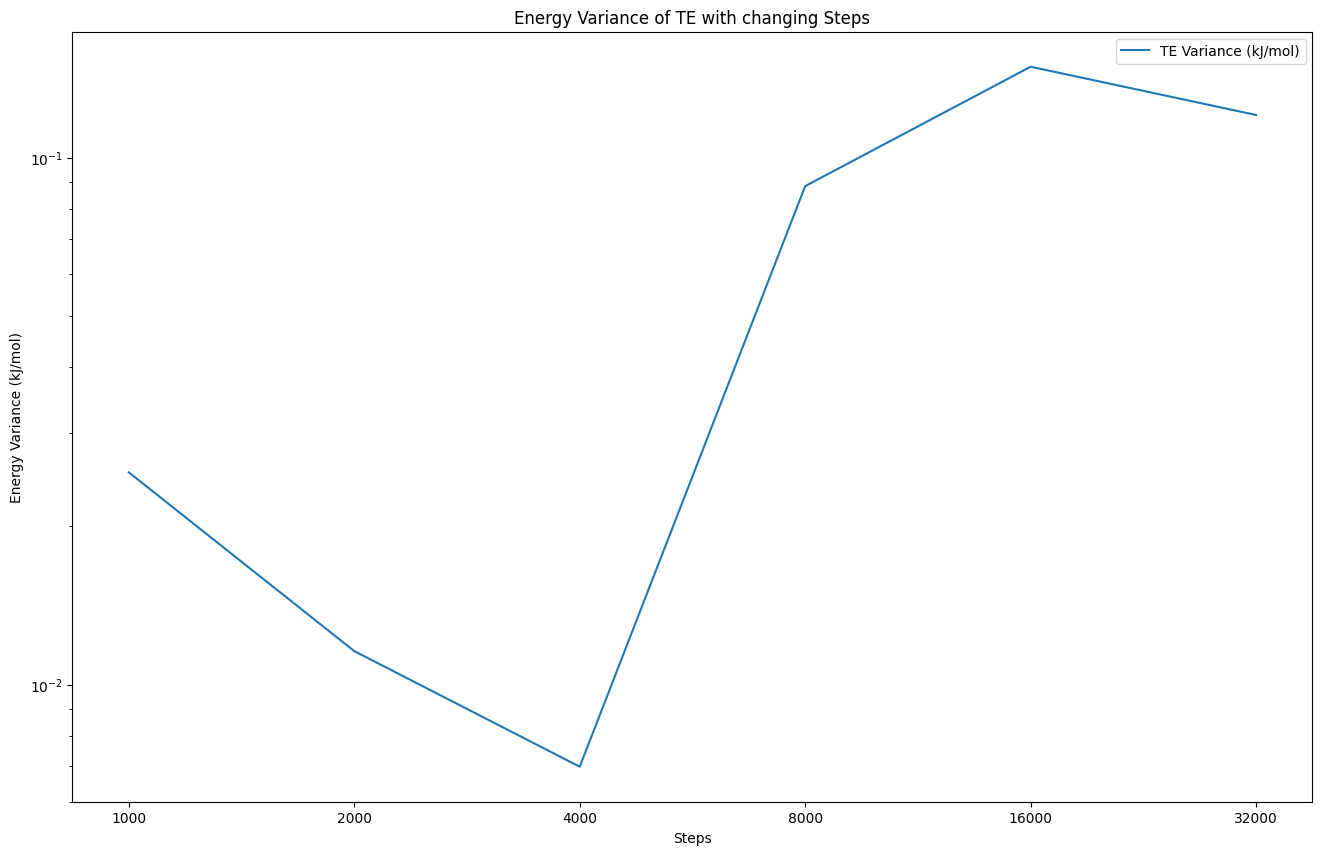

In [7]:
def AVGVARTrends (ensembleType, change: str):
    #####Parameters
    steps = 1000                       # Number of Simulation Steps/Frames Simulated/Rendered (Unitless) (Integer)
    skipSteps = 1                       # The Step Size of each Frame Generated (Unitless) (Integer)
    Temperature=225.                    # Temperature at which the simulation is simulated (Kelvin)
    dt = 0.001 # * unit.femtoseconds       # The Change in Time between each Frame (Femtoseconds)
    nonbondedCutoff=1e3*unit.nanometer  # Distance constituting a Bond between Atoms (Nanometers)
    ensemble=ensembleType                      # NVE or NVT Ensemble Type (Unitless) (String)
    #####

    if change == "DT":
        columnHeaders = ["Dt (Femtoseconds)", "KE Average (kJ/mol)", "KE Variance (kJ/mol)", "PE Average (kJ/mol)", "PE Variance (kJ/mol)", "TE Average (kJ/mol)", "TE Variance (kJ/mol)"]
        xIndex = "Dt (Femtoseconds)"
    else:
        columnHeaders = ["Steps", "KE Average (kJ/mol)", "KE Variance (kJ/mol)", "PE Average (kJ/mol)", "PE Variance (kJ/mol)", "TE Average (kJ/mol)", "TE Variance (kJ/mol)"]
        xIndex = "Steps"

    results = []
    
    # Loop through 6 Times
    for i in range(6):
        if change == "DT":
            results.append(Q2_3_DT(steps, Temperature, dt, ensemble, nonbondedCutoff))
            dt *= 2
        else:
            results.append(Q2_3_Steps(steps, Temperature, dt, ensemble, nonbondedCutoff))
            steps *= 2
    
    # Load info into a Dataframes
    Mods = pd.DataFrame(results, columns=columnHeaders)

    # Display the Dataframe in a Friendly Format
    display(Mods)

    # Average Plot 
    plt.figure(figsize=(16, 10))
    plt.plot(Mods[xIndex], Mods["KE Average (kJ/mol)"], "-", label="KE Average (kJ/mol)")
    plt.plot(Mods[xIndex], Mods["PE Average (kJ/mol)"], "-", label="PE Average (kJ/mol)")
    plt.plot(Mods[xIndex], Mods["TE Average (kJ/mol)"], "-", label="TE Average (kJ/mol)")
    plt.xscale("log", base=2)
    plt.xticks(Mods[xIndex], Mods[xIndex])
    plt.title(f"Average Energy of KE, PE and TE with changing {change}")
    plt.xlabel(xIndex)
    plt.ylabel("Average Energy (kJ/mol)")
    plt.legend(title="Average Types")
    plt.savefig(f"Q2_{change}_AVG_Graph.png")
    plt.show()


    # Variance (KE and PE)
    plt.figure(figsize=(16, 10))
    plt.plot(Mods[xIndex], Mods["KE Variance (kJ/mol)"], "r-", label="KE Variance (kJ/mol)")
    plt.plot(Mods[xIndex], Mods["PE Variance (kJ/mol)"], "b--", label="PE Variance (kJ/mol)")
    plt.xscale("log", base=2)
    plt.xticks(Mods[xIndex], Mods[xIndex])
    plt.title(f"Energy Variance of KE and PE with changing {change}")
    plt.xlabel(xIndex)
    plt.ylabel("Energy Variance (kJ/mol)")
    plt.legend(title="Variance Types")
    plt.savefig(f"Q2_{change}_VAR_KEPE_Graph.png")
    plt.show()


    # Variance TE
    plt.figure(figsize=(16, 10))
    plt.plot(Mods[xIndex], Mods["TE Variance (kJ/mol)"], "-", label="TE Variance (kJ/mol)")
    plt.xscale("log", base=2)
    plt.yscale("log", base=10)
    plt.xticks(Mods[xIndex], Mods[xIndex])
    plt.title(f"Energy Variance of TE with changing {change}")
    plt.xlabel(xIndex)
    plt.ylabel("Energy Variance (kJ/mol)")
    plt.legend()
    plt.savefig(f"Q2_{change}_VAR_TE_Graph.png")
    plt.show()
    
AVGVARTrends(ensemble, "DT")
AVGVARTrends(ensemble, "Steps")
